In [1]:
import numpy as np
import math 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import enum

import nltk
from nltk.stem import WordNetLemmatizer
#1=ham, 2=spam 

# Helper Functions

In [2]:

# helper function to calculate probabilities
def prob(arr1, arr2):
    result = 1
    
    for i in range(len(arr1)):
        result = result+math.log(math.pow(arr1[i],arr2[i]))
        
    return result

def f1_score(actual,prediction):
    precision=precision_score(actual,prediction)
    recall=recall_score(actual,prediction)
    f1_score_value=2*(precision*recall)/(precision+recall)
    return round(f1_score_value,8)

def precision_score(actual,prediction):
    cm=confusion_matrix(actual,prediction)
    precision=cm[1,1]/(cm[1,1]+cm[0,1])
    return round(precision,8)

def recall_score(actual,prediction):
    cm=confusion_matrix(actual,prediction)
    recall=cm[1,1]/(cm[1,1]+cm[1,0])
    return round(recall,8)

def confusion_matrix(actual, prediction):
    FN,TN,FP,TP=0,0,0,0
    if actual.shape==prediction.shape:
        for x in range(0, len(actual)):
            if actual[x] == 0 and actual[x]==prediction[x]:
                TN=TN+1
            if actual[x]==1 and actual[x]==prediction[x]:
                TP=TP+1
            if actual[x]==0 and actual[x]!=prediction[x]:
                FP=FP+1
            if actual[x]==1 and actual[x]!=prediction[x]: 
                FN=FN+1  
    return (np.array([[TN,FP],[FN,TP]]))

def get_accuracy(actual,prediction):
    correct=0
    if actual.shape==prediction.shape:
        for x in range(0, len(actual)):
            if actual[x] == prediction[x]:
                correct=correct+1
    accuracy=round(correct/len(actual),8)
    return accuracy

# Naive Bayes Classifier


# Part A : Model Code

In [3]:
print("Solution 1")

class Multinomial_NB:
    def __init__(self, alpha = 1.0):
        self.alpha = alpha
        self.X_train = np.array([])
        self.Y_train = np.array([])
        self.prior_ham = 0
        self.prior_spam = 1
        self.theta_j_ham = np.array([])
        self.theta_j_spam = np.array([])
        
    
    def fit(self,X,Y):
        self.X_train = X
        self.Y_train = Y
        
        total_ham_documents = 0
        total_spam_documents = 0
        
        no_of_features = len(self.X_train[0])
        
        
        features_in_ham = [0]*no_of_features # no of times each feature occoured in ham documents
        features_in_spam = [0]*no_of_features # no of times each feature occoured in spam documents
        
        self.theta_j_ham = [0]*no_of_features
        self.theta_j_spam = [0]*no_of_features
        
        
        for i in range(len(self.Y_train)):
           
            if(self.Y_train[i]==2):
                total_spam_documents = total_spam_documents+1
            elif (self.Y_train[i]==1):
                total_ham_documents = total_ham_documents+1
                
            else:
                print("UNKNOWN in fit")
        print("Total ham documents : ",total_ham_documents, "total spam documents : ",total_spam_documents)
        
        for i in range(len(self.X_train)):
            
            if(self.Y_train[i] == 1):
                features_in_ham = np.add(features_in_ham,X_train[i]) 
                
                
            elif(self.Y_train[i] == 2):
                features_in_spam = np.add(features_in_spam,X_train[i]) 
                # Updating the no of times each feature occoured in spam documents
            else:
                print("UNKNOWN in fit 2")
                
        prior_ham = (self.alpha+total_ham_documents)/(2*self.alpha +len(self.X_train))
        prior_spam = (self.alpha+total_spam_documents)/(2*self.alpha+len(self.X_train))
        
        print("counts of features in ham documents : ",features_in_ham, "counts of features in spam documents : ", features_in_spam )
        print("Priors : prior_ham = ",prior_ham, " prior_spam = ", prior_spam)
        
        for j in range(no_of_features):
            self.theta_j_ham[j] = (self.alpha + features_in_ham[j])/(no_of_features*self.alpha + total_ham_documents)
            self.theta_j_spam[j] = (self.alpha + features_in_spam[j])/(no_of_features*self.alpha + total_spam_documents)
    
    
    def predict(self,X):
        
        X_test = X
        cond_prob_of_spam = [0]*len(X_test)
        cond_prob_of_ham = [0]*len(X_test)
        y_pred_test = [0]*len(X_test)
        
        for i in range(len(X_test)):
            
            cond_prob_of_ham[i] = self.prior_ham*prob(self.theta_j_ham,X_test[i])
            cond_prob_of_spam[i] = self.prior_spam*prob(self.theta_j_spam,X_test[i])
            
            if(cond_prob_of_ham[i] > cond_prob_of_spam[i]):
                y_pred_test[i] = 1
                
            else:
                y_pred_test[i] = 2
        
        
        
        return np.array(y_pred_test)
    
    
    def predict_proba(self,X):
        self.X_test = X
        cond_prob_of_spam = [0]*len(self.X_test)
        cond_prob_of_ham = [0]*len(self.X_test)
        
        y_pred_test = [0]*len(self.X_test)
        
        for i in range(len(self.X_test)):
            
            cond_prob_of_ham[i] = math.exp(self.prior_ham*prob(self.theta_j_ham,self.X_test[i]))
            cond_prob_of_spam[i] = math.exp(self.prior_spam*prob(self.theta_j_spam,self.X_test[i]))
            
        combined = np.vstack((cond_prob_of_ham,cond_prob_of_spam)).T
        return(combined)
    
    def predict_log_proba(self,X):
        self.X_test = X
        cond_prob_of_spam = [0]*len(self.X_test)
        cond_prob_of_ham = [0]*len(self.X_test)
        y_pred_test = [0]*len(self.X_test)  
        
        for i in range(len(self.X_test)):
            cond_prob_of_ham[i] = self.prior_ham*prob(self.theta_j_ham,self.X_test[i])
            cond_prob_of_spam[i] = self.prior_spam*prob(self.theta_j_spam,self.X_test[i])
            
        combined = np.vstack((cond_prob_of_ham,cond_prob_of_spam)).T
        
        return(combined)
        
        

Solution 1


# Part B: Exploratory Data Analysis

In [4]:
print("Solution 2")
df = pd.read_csv('SMSSpamCollection.csv')

Solution 2


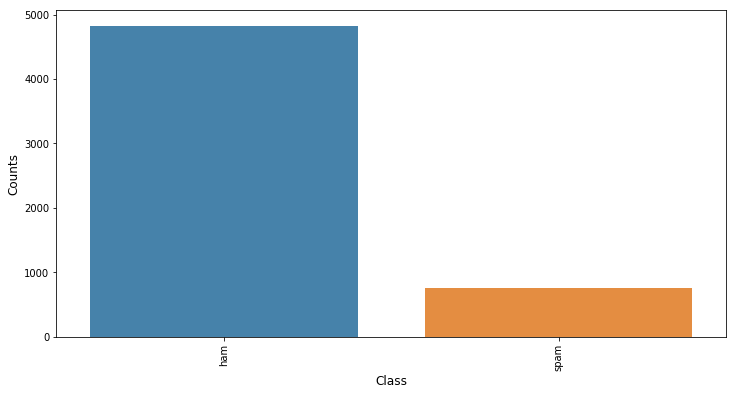

In [5]:
label_counts = df.Class.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Class', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

# Part C: Feature Extraction

In [6]:
print(df)


df.columns = ['Type', 'Data']

df['Type'] = pd.factorize(df['Type'])[0] + 1
df.info()

#Type 1 = ham and Type 2 = spam

print("Solution 3")
df.describe()
print("Solution 5")
nltk.download('punkt')
#%%time

lemmatizer = WordNetLemmatizer()

df['Lemmatized_Data'] = df['Data'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text.lower())))


     Class                                               Text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

[nltk_data] Downloading package punkt to /Users/smaan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Solution 6


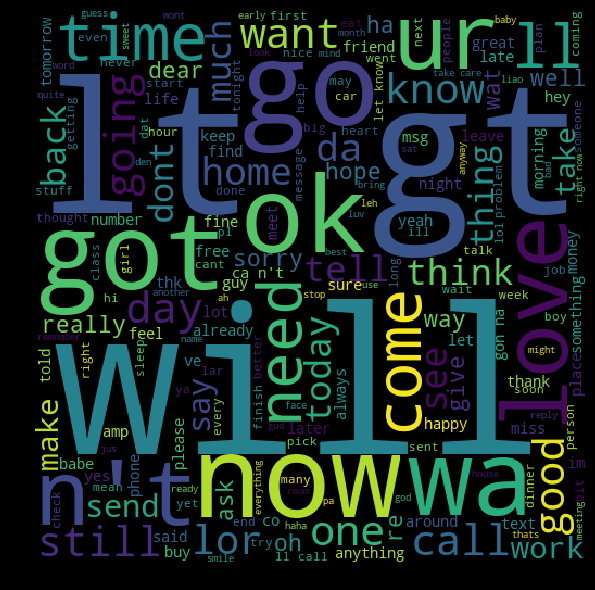

In [7]:
print("Solution 6")
import matplotlib.pyplot as plt
from wordcloud import WordCloud
ham_words = ''.join(list(df[df['Type']==1]['Lemmatized_Data']))
ham_wordclod = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()



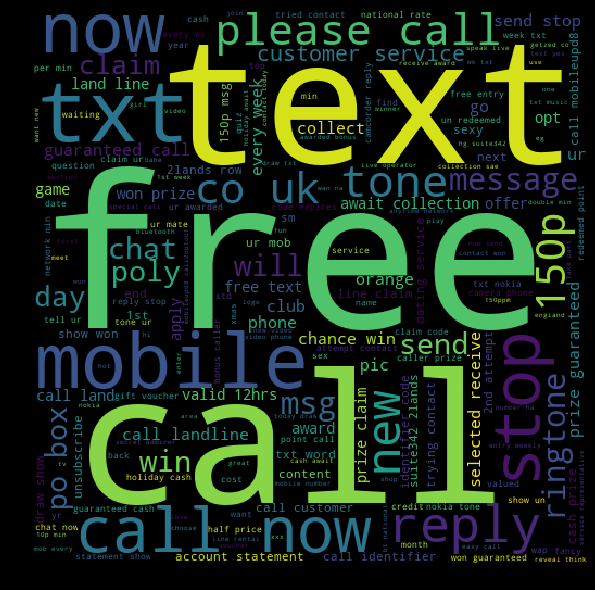

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
spam_words = ''.join(list(df[df['Type']==2]['Lemmatized_Data']))
spam_wordclod = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wordclod)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


In [9]:
print("Solution 9")
df.sample(frac=1)

print("Solution 7")
# For removing the stop words, we use the feature stop_words = 'english'. It is provided in the documentation that the stop words are sometime very important in identifying the context. So, we are going to experiment also without removing the stop words.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
X_data = df["Data"]
count_vect = CountVectorizer(lowercase=True, stop_words='english', binary=True)
X_counts = count_vect.fit_transform(X_data)

#print("Feature Names:")
#print(count_vect.get_feature_names())
count_vector = count_vect.get_feature_names()
numcols = len(count_vector)
print("No of features : ", numcols)

#print("\nVocabulary: ", count_vect.vocabulary_)
#print("\nCount Vector Matrix")

 

#The data matrix to be used for all the calculations in above questions is X.
#X is a 2d matrix which contains counts for all rows of df's colums "Data".
#It has not been divided into train and test data yet.

Solution 9
Solution 7
No of features :  8471


In [10]:
print("Solution 8")

X = X_counts.toarray()
#print(X_counts.toarray())

#print(len(X_counts_to_array[0]))

Y = df["Type"]
print(Y)

Solution 8
0       1
1       1
2       2
3       1
4       1
5       2
6       1
7       1
8       2
9       2
10      1
11      2
12      2
13      1
14      1
15      2
16      1
17      1
18      1
19      2
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
5544    1
5545    1
5546    1
5547    1
5548    1
5549    2
5550    1
5551    1
5552    1
5553    1
5554    1
5555    1
5556    1
5557    1
5558    1
5559    1
5560    1
5561    1
5562    1
5563    1
5564    1
5565    1
5566    1
5567    1
5568    2
5569    2
5570    1
5571    1
5572    1
5573    1
Name: Type, Length: 5574, dtype: int64


In [11]:
print("Solution 10")
def partition(X, Y, t):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, t)  
    #print("X_Train count : ", len(X_train)," X_test count = ", len(X_test), " Y_train count = ", len(Y_train), " Y_test count = ",len(Y_test)) )
    print("X_Train count : ",len(X_train))
    print("X_test count = ", len(X_test))
    print("Y_train count = ", len(Y_train))
    print("Y_test count = ",len(Y_test))
    return X_train, X_test, Y_train, Y_test


def train_test_split(X,Y,t):
    size = X.shape[0]
    split_idx = int(size*(1-t))    
    return X[:split_idx], X[split_idx:],Y[:split_idx], Y[split_idx:]

X_train, X_test, y_train, y_test = partition(np.array(X),np.array(Y),0.2)



Solution 10
X_Train count :  4459
X_test count =  1115
Y_train count =  4459
Y_test count =  1115


# Part D: Model Evaluation

In [12]:
print("Solution 11")
def partition_data(data,folds):
    
    split_idx=int(data.shape[0]/folds)
    idx=[]
    indexes= np.arange(0,data.shape[0])
    
    for f in range(folds):
        
        test = indexes[:split_idx]
        train = indexes[split_idx:]
        i=np.arange(0,split_idx)
        indexes=np.delete(indexes,i)        
        indexes=np.append(indexes,test)
        idx.append((train,test))
        
    return np.asarray(idx)


def kFold(folds, X, y, model):
    
    split_folds = partition_data(X,folds)
    average_test_error, average_train_error =[], []
    
    for train_index, test_index in split_folds:
        X_t, X_te = X[train_index], X[test_index]
        y_t, y_te = y[train_index], y[test_index]
            
        model.fit(X_t, y_t) 
        y_test_pred = model.predict(X_te)
        y_train_pred = model.predict(X_t)
        
        average_test_error.append(f1_score(y_te, y_test_pred))
        average_train_error.append(f1_score(y_t, y_train_pred))
        
    return np.mean(average_train_error), np.mean(average_test_error)
        



Solution 11


In [13]:
alpha = [0.1, 0.5, 1.0, 1.5, 2.0]

best_score = -sys.maxsize
best_model = None

for a in alpha:
    model = Multinomial_NB(a)
    
    train_score, test_score = kFold(3, X_train, y_train, model)
    
    print("Alpha: ", a, "F1 Score: ", test_score)
    
    if best_score < test_score:
        best_score = test_score
        best_model = model
        

    
    
    
    

Total ham documents :  2585 total spam documents :  388
counts of features in ham documents :  [ 8 17  1 ...  1  1  0] counts of features in spam documents :  [0 1 0 ... 0 0 0]
Priors : prior_ham =  0.8694672406834387  prior_spam =  0.1305327593165613
Total ham documents :  2562 total spam documents :  411
counts of features in ham documents :  [ 7 16  1 ...  1  1  0] counts of features in spam documents :  [1 2 0 ... 0 0 0]
Priors : prior_ham =  0.8617314677788241  prior_spam =  0.13826853222117585
Total ham documents :  2568 total spam documents :  405
counts of features in ham documents :  [ 7 15  1 ...  1  1  0] counts of features in spam documents :  [1 3 0 ... 0 0 0]
Priors : prior_ham =  0.8637494954930715  prior_spam =  0.13625050450692858
Alpha:  0.1 F1 Score:  0.99779412
Total ham documents :  2585 total spam documents :  388
counts of features in ham documents :  [ 8 17  1 ...  1  1  0] counts of features in spam documents :  [0 1 0 ... 0 0 0]
Priors : prior_ham =  0.8693678

In [14]:
array = best_model.predict_proba(X_train)

In [15]:
print(array.shape)
thresholds = np.zeros((X_train.shape[0]))
print(thresholds.shape)
for i in range(X_train.shape[0]):
    thresholds[i] = array[i][0]/(array[i][0]+array[i][1])
    

y_scores = array[0, :] 



def get_tpr_fpr_threshold(y_train,y_scores):
    
    #thresholds=np.arange(0,1.1,0.1)
    TPR=[]
    FPR=[]
    i=0
    tp,fp,tn,fn=0,0,0,0    
    print( confusion_matrix(y_train,y_scores ))
    for i in range(len(y_scores)):
        print()
        if np.logical_and(y_scores[i]>thresholds[i] , y_train[i]==1):
            tp=tp+1
        if np.logical_and(y_scores[i]<thresholds[i] , y_train[i]==2):
            tn=tn+1
        if np.logical_and(y_scores[i]>thresholds[i] , y_train[i]==2):
            fp=fp+1
        if np.logical_and(y_scores[i]<thresholds[i] , y_train[i]==1):
            fn=fn+1   
           
    tpr=tp/(tp+fn)
    fpr=fp/(fp+tn)
    FPR.append(fpr)
    TPR.append(tpr)
    return TPR,FPR

import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
print("y_train",y_train, "y_scores", y_scores)
fpr, tpr = get_tpr_fpr_threshold(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    
plot_roc_curve(fpr, tpr)

(4459, 2)
(4459,)
y_train [1 1 2 ... 1 1 1] y_scores [1.00000000e+00 1.29665956e-40]
[[0 0]
 [0 0]]




ZeroDivisionError: division by zero

<Figure size 720x432 with 0 Axes>

In [16]:
print("Solution 13")
y_best_pred = best_model.predict(X_test)

print("a.Precision: ", precision_score(y_test,y_best_pred ))

print("b. Recall: ", recall_score(y_test,y_best_pred ))

print("c. F1Score: ", f1_score(y_test,y_best_pred ))

print("d. Confusion Matrix: ", confusion_matrix(y_test,y_best_pred ))

print("e. Accuracy: ", get_accuracy(y_test,y_best_pred ))

Solution 13
a.Precision:  1.0
b. Recall:  0.99484536
c. F1Score:  0.99741602
d. Confusion Matrix:  [[  0   0]
 [  5 965]]
e. Accuracy:  0.86547085


In [ ]:
print("Solution 14 ")

# Theere are actually 3 parameters for smoothing, alpha, Beta_0 and Beta_1. 
# Given that The hyperparameter should be alpha. So, I'm considering the rest of the smoothing parameters, Beta_0 and Beta_1 as 1.
import numpy as np
class Multivariate_Bernoulli:
    def __init__(self, alpha = 1.0):
        self.alpha = alpha
        self.X_train = np.array([])
        self.Y_train = np.array([])
        self.prior_ham = 0
        self.prior_spam = 1
        self.theta_j_ham = np.array([])
        self.theta_j_spam = np.array([])
    
    def fit(self,X,Y):
        self.X_train = X
        self.Y_train = Y
        
        total_ham_documents = 0
        total_spam_documents = 0
        
        no_of_features = len(self.X_train[0])
        
        
        self.theta_j_ham = [0]*no_of_features
        self.theta_j_spam = [0]*no_of_features
        
        no_of_ham_with_feature = [0]*no_of_features
        no_of_spam_with_feature = [0]*no_of_features
        
        
        for i in range(len(self.Y_train)):
           
            if(self.Y_train[i]==2):
                total_spam_documents = total_spam_documents+1
            elif (self.Y_train[i]==1):
                total_ham_documents = total_ham_documents+1
                
            else:
                print("UNKNOWN in fit")
        print("Total ham documents : ",total_ham_documents, "total spam documents : ",total_spam_documents)
        
        
        for i in range(len(self.X_train)):
            if self.Y_train[i] == 1:
                for j in range(no_of_features):
                    if self.X_train[i][j] != 0:
                        #print("here, self.X_train[i][j] = ", self.X_train[i][j])
                        no_of_ham_with_feature[j] =  no_of_ham_with_feature[j]+1
                        
            elif self.Y_train[i] == 2: 
                for j in range(no_of_features):
                    if self.X_train[i][j] != 0:
                        #print("here1")
                        no_of_spam_with_feature[j] = no_of_spam_with_feature[j]+1
            
                
        prior_ham = (self.alpha+total_ham_documents)/(2*self.alpha +len(self.X_train))
        prior_spam = (self.alpha+total_spam_documents)/(2*self.alpha+len(self.X_train))
        

        print("Priors : prior_ham = ",prior_ham, " prior_spam = ", prior_spam)
        

        
        for j in range(no_of_features):
            self.theta_j_ham[j] = (1 + no_of_ham_with_feature[j])/(2 + total_ham_documents)
            self.theta_j_spam[j] = (1 + no_of_spam_with_feature[j])/(2 + total_ham_documents)
    
    
    def predict(self,X):
        
        X_test = X
        cond_prob_of_spam = [0]*len(X_test)
        cond_prob_of_ham = [0]*len(X_test)
        y_pred_test = [0]*len(X_test)
        
        for i in range(len(X_test)):
            
            cond_prob_of_ham[i] = self.prior_ham*prob(self.theta_j_ham,X_test[i])
            cond_prob_of_spam[i] = self.prior_spam*prob(self.theta_j_spam,X_test[i])
            
            if(cond_prob_of_ham[i] > cond_prob_of_spam[i]):
                y_pred_test[i] = 1
                
            else:
                y_pred_test[i] = 2        
        
        return np.array(y_pred_test)
    

    

In [ ]:
alpha = [0.1, 0.5, 1.0]

best_score = -sys.maxsize
best_model1 = None

for a in alpha:
    model = Multivariate_Bernoulli(a)
    
    train_score, test_score = kFold(3, X_train, y_train, model)
    
    print("Alpha: ", a, "F1 Score: ", test_score)
    
    if best_score < test_score:
        best_score = test_score
        best_model1 = model
        
        
        
print("Solution 16")
y_best_pred = best_model1.predict(X_test)

print("a.Precision: ", precision_score(y_test,y_best_pred ))

print("b. Recall: ", recall_score(y_test,y_best_pred ))

print("c. F1Score: ", f1_score(y_test,y_best_pred ))

print("d. Confusion Matrix: ", confusion_matrix(y_test,y_best_pred ))

print("e. Accuracy: ", get_accuracy(y_test,y_best_pred ))

# Multi - Class Classification

In [21]:
def one_hot_labels(Y, no_of_classes = 3):
    Y = np.asarray(Y)
    one_hot_vector = np.diag([1]*no_of_classes) 
    return np.array([one_hot_vector[Y[i]] for i in range(Y.shape[0])])
    
one_hot_labels([1,1,2,2,0,0,0])

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [22]:
# score is an n X d matrix and softmax function calculates the exponential of the scores and normalizes them.

def softmax(score):

    scaler = MinMaxScaler().fit(score)
    score = scaler.transform(score)
    new_score = np.exp(score)
    
#     new_score = np.exp(new_score- np.amax(new_score, axis=1, keepdims = True))
    
    sum_exp = np.sum( new_score, axis =1 )
    softmax = []
    
    for i in range(len(new_score)):

        softmax.append( np.divide(new_score[i,:], sum_exp[i]))
    return np.array(softmax)

print(softmax([[1,2,3,4,90000000000,9900000000],[3,6,8,10,10000000,10000000000]]))



[[0.12956251 0.12956251 0.12956251 0.12956251 0.35218743 0.12956251]
 [0.1862933  0.1862933  0.1862933  0.1862933  0.06853348 0.1862933 ]]


In [23]:
def cross_entropy_loss(Y_one_hot, Y_proba):
    N = Y_one_hot.shape[0]
    return -(np.sum(Y_one_hot * np.log(Y_proba))/N)

In [24]:
def train_test_split(X,y,t):
    size = X.shape[0]
    split_idx = int(size*(1-t))    
    return X[:split_idx], X[split_idx:],y[:split_idx], y[split_idx:]

def partition(X, y, t):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)   
    return X_train, X_test, y_train, y_test

In [25]:
class ErrorFunction(enum.Enum):
    mse = 'mse'
    rmse = 'rmse'
    accuracy = 'accuracy'

def error_score(error_function, y_pred, y_true):
    
    if error_function == ErrorFunction.mse.value:
        return abs((np.square(Y_true - Y_pred)).mean())
    
    elif error_function == ErrorFunction.rmse.value:
        return np.sqrt((np.square(Y_true - Y_pred)).mean())
    
    elif error_function == ErrorFunction.accuracy.value:
        
        correct=0
            
        for x in range(y_pred.shape[0]):
            
            if np.argmax(y_pred[x,:]) == np.argmax(y_true[x,:]):
                    
                correct=correct+1
                
                    
        accuracy=round(correct/y_pred.shape[0],8)
        return 1 - accuracy

print("acc",error_score(ErrorFunction.accuracy.value, np.array([[1,0,0],[1,0,0]]),np.array([[1,0,0],[0,0,1]])))


def confusion_matrix(y_pred, y_true):
    
    CM = np.zeros(shape=(y_pred.shape[1],y_pred.shape[1]))
    
    for x in range(y_pred.shape[0]):

        true_index = np.argmax(y_true[x, :])
        pred_index = np.argmax(y_pred[x, :])
        CM[true_index,pred_index] = CM[true_index,pred_index] + 1
        
    return CM

def regularization(regularizer , theta):
        
    if regularizer =='l1':
        sum_of_theta = np.sum(theta[1:,:])
        constant = np.ones((theta.shape))
        return constant if sum_of_theta > 0 else constant * (-1)
        
    elif regularizer =='l2':
        square_of_theta = np.sum(np.square(theta[1:,:]))
        return np.ones((theta.shape)) * square_of_theta
        
    else:
        return 0
    
def early_stopping_curve(train, val, epoch):
    list_epoch = np.arange(epoch+1)
    plt.figure(figsize=(10, 6))
    plt.plot(list_epoch, train, "r-+", linewidth=3, label="Training Score")
    plt.plot(list_epoch, val, "b-", linewidth=2, label="Cross-validation Score")
    plt.legend(loc="best", fontsize=14) 
    plt.xlabel("Epoch", fontsize=14) 
    plt.ylabel("Cost(Cross Entropy)", fontsize=14) 
    plt.title("Early Stopping ")
    plt.show()

acc 0.5


In [26]:
class Softmax_Regression:
    
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None,lambd=0.0,early_stopping=False, validation_fraction=0.1,**kwargs):
        self.X = X
        self.y = Y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.regularizer = regularizer
        self.lambd = lambd
        self.early_stopping = early_stopping
        self.validation_fraction = validation_fraction
        self.early_stop_number = 50 # default
        self.error_function = ErrorFunction.mse.value
        
        for key, value in kwargs.items():
            if key == 'early_stop_number':
                self.early_stop_number = value
                
            if key == 'error_function':
                self.error_function = value
                
        
        y_one_hot = one_hot_labels(self.y)
        theta = np.zeros(shape = (self.X.shape[1]+1,y_one_hot.shape[1]))
        X_bias=np.c_[np.ones((self.X.shape[0],1)),self.X]
        N = X_bias.shape[0]
        counter = 1
        
        val_cost_list = []
        train_cost_list = []
        final_epoch = 0
        
        if self.early_stopping:
            X_bias, X_val, self.y, y_val = train_test_split(X_bias,self.y,self.validation_fraction)                
            
        y_one_hot = one_hot_labels(self.y)
        prev_sm_score = softmax(np.matmul(X_bias,theta)) 
        
        prev_cross_entropy_loss = cross_entropy_loss(y_one_hot, prev_sm_score)    
        
        
        for epoch in range(self.epochs):
            '''matmul between X_bias(N x d+1) and weight vector(d+1, C). No need to do the transpose of the weight vector.
            We would get the score matrix of (N x C)'''
                      
            regularized_constant = self.lambd * regularization(self.regularizer, theta)
                     
            theta_hat = theta - (self.learning_rate/N) * (np.dot(X_bias.T,(prev_sm_score-y_one_hot) )+ regularized_constant)
            
            current_sm_score = softmax(np.matmul(X_bias,theta_hat)) 
            current_cross_entropy_loss = cross_entropy_loss(y_one_hot, current_sm_score)
                       
            final_epoch = epoch          
            if self.early_stopping:
                
                y_pred_val = np.dot(X_val, theta_hat) 
                sm_val_score = softmax(np.matmul(X_val,theta_hat))
                
                y_val_one_hot = one_hot_labels(y_val)
                current_val_cross_entropy_loss = cross_entropy_loss(y_val_one_hot, sm_val_score)
                
               
                val_cost_list.append(current_val_cross_entropy_loss)
                train_cost_list.append(current_cross_entropy_loss)
                final_epoch = epoch
                if counter == 1:
                    counter = counter +1
                    prev_val_cross_entropy_loss = current_val_cross_entropy_loss
                    continue
                    
                if self.tol and current_val_cross_entropy_loss > prev_val_cross_entropy_loss - self.tol:
                    break
                    
                elif current_val_cross_entropy_loss > prev_val_cross_entropy_loss:
                    break
                
                
                    
            elif self.tol and current_cross_entropy_loss > prev_cross_entropy_loss - self.tol:
                break
            
            elif current_cross_entropy_loss > prev_cross_entropy_loss:
                break
                
            # update previous values
            theta = theta_hat
            prev_cross_entropy_loss = current_cross_entropy_loss
            prev_sm_score =current_sm_score
            
        if self.early_stopping:  
            
            early_stopping_curve(train_cost_list, val_cost_list, final_epoch)  
            
        self.theta = theta_hat
        
        
    def predict(self, X):
        X_test_bias=np.c_[np.ones((X_test.shape[0],1)),X_test]
        y_pred = np.dot(X_test_bias, self.theta)
        return y_pred
        
  
        

# Part B: Exploratory Data Analysis

In [27]:
from sklearn import datasets
print('Solution 19')

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

Solution 19


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
print('Solution 20')
df.describe()

Solution 20


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
print('Solution 21')
df = df.sample(frac=1)

Solution 21


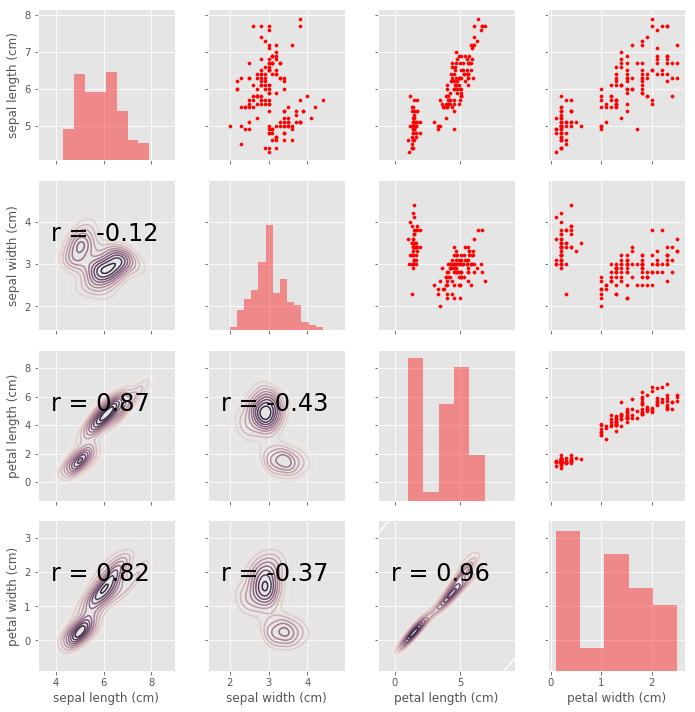

In [30]:
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [31]:

X = iris["data"]  # petal length, petal width
y = iris["target"]

print('Solution 23')


scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

print(X.shape)
print(y.shape)
print(np.unique(y))

Solution 23
(150, 4)
(150,)
[0 1 2]


In [32]:
print('Solution 24')
def train_test_split(X,y,t):
    size = X.shape[0]
    split_idx = int(size*(1-t))    
    return X[:split_idx], X[split_idx:],y[:split_idx], y[split_idx:]

def partition(X, y, t):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)   
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = partition(X,y,0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Solution 24
(120, 4)
(30, 4)
(120,)
(30,)


# Part C: Model Evaluation

In [33]:
print("Solution 11")

def partition_data(data,folds):
    
    split_idx=int(data.shape[0]/folds)
    idx=[]
    indexes= np.arange(0,data.shape[0])
    
    for f in range(folds):
        
        test = indexes[:split_idx]
        train = indexes[split_idx:]
        i=np.arange(0,split_idx)
        indexes=np.delete(indexes,i)        
        indexes=np.append(indexes,test)
        idx.append((train,test))
        
    return np.asarray(idx)

def kFold(folds, X, y, model, error_function, **model_args):
    split_folds=partition_data(X,folds)
    test_error = []
    true_label = []
    pred_label = []
    train_error = []
    
    learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init =0.0001, 1000, None,None,0.0
    
    for key, value in model_args.items(): 
            
            
        if key=='learning_rate':
                learning_rate_init=value
                
        if key=='epochs':
                epoch_init=value
                
        if key=='tol':
                tol_init=value
                
        if key=="regularizer":
                regularizer_init=value
                
        if key=="lambd":
                lambd_init=value
                
            
    print("learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init:",
             learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init, error_function)
    
    for train_index, test_index in split_folds:
        X_t, X_te = X[train_index], X[test_index]
        y_t, y_te = y[train_index], y[test_index]
               
        model.fit(X_t, y_t, learning_rate = learning_rate_init, epochs= epoch_init, tol = tol_init,
                  regularizer = regularizer_init,lambd = lambd_init, error = error_function)
                
        y_test_pred=model.predict( X_te)
        y_train_pred = model.predict( X_t)
            
        one_hot_y_te = one_hot_labels(y_te)
        one_hot_y_t = one_hot_labels(y_t)

        true_label.append(y_te)
        pred_label.append(y_test_pred)
        
        if error_function == ErrorFunction.mse.value:
            
            avg_test_error = error_score (ErrorFunction.mse.value,y_test_pred, one_hot_y_te)
            avg_train_error = error_score (ErrorFunction.mse.value,y_train_pred, one_hot_y_t)
            
        elif error_function == ErrorFunction.rmse.value:
            avg_test_error = error_score (ErrorFunction.rmse.value,y_test_pred, one_hot_y_te)
            avg_train_error = error_score (ErrorFunction.rmse.value,y_train_pred, one_hot_y_t)
            
        elif error_function == ErrorFunction.accuracy.value:
            avg_test_error = error_score (ErrorFunction.accuracy.value,y_test_pred, one_hot_y_te)
            avg_train_error = error_score (ErrorFunction.accuracy.value,y_train_pred, one_hot_y_t)
        
        test_error.append(avg_test_error)
        train_error.append(avg_train_error)
    
    return np.mean(np.array(train_error)), np.mean(np.array(test_error))



Solution 11


In [34]:
print('Solution 25')
lambd= [1.0, 0.1,0.01, 0.001, 0.0001]
tol = [0.001, 0.0001, 0.00001, 0.000001, 0.0000001]
learning_rate = [0.1, 0.01, 0.001]
regularizer= ['l1', 'l2']

lowest_error = sys.maxsize
best_lambd, best_learning_rate, best_regularizer, best_tol= 0.0, 0.0, 'l1',0.0
best_model = None


for lambd_value in lambd:
    for tol_value in tol:
        for learning_rate_value in learning_rate:
            for regularizer_value in regularizer:
                
                softmax_regression = Softmax_Regression()
                train_error, test_error = kFold(3, X_train, y_train, softmax_regression, 
                                                                ErrorFunction.accuracy.value, lambd = lambd_value, 
                                                                learning_rate= learning_rate_value,
                                                                regularizer= regularizer_value,
                                                                tol = tol_value)
            
            
                print( "Accuracy(Generalization error): ", test_error, "lambd: " , lambd_value, "learning_rate: ", 
                      learning_rate_value, "regularizer: ", regularizer_value, "tol: ", tol_value)
                
                if lowest_error > test_error:
                
                    best_lambd, best_learning_rate, best_regularizer, best_tol, lowest_error = lambd_value, learning_rate_value, regularizer_value, tol_value, test_error              
#                     best_y_pred, best_y_true = y_pred, y_true
                    best_model = softmax_regression
                
print("best_lambd, best_learning_rate, best_regularizer, lowest_error:" ,
      best_lambd, best_learning_rate, best_regularizer, lowest_error)

Solution 25
learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init: 0.1 1000 0.001 l1 1.0 accuracy
Accuracy(Generalization error):  0.9 lambd:  1.0 learning_rate:  0.1 regularizer:  l1 tol:  0.001
learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init: 0.1 1000 0.001 l2 1.0 accuracy
Accuracy(Generalization error):  0.9 lambd:  1.0 learning_rate:  0.1 regularizer:  l2 tol:  0.001
learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init: 0.01 1000 0.001 l1 1.0 accuracy
Accuracy(Generalization error):  0.9 lambd:  1.0 learning_rate:  0.01 regularizer:  l1 tol:  0.001
learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init: 0.01 1000 0.001 l2 1.0 accuracy
Accuracy(Generalization error):  0.9 lambd:  1.0 learning_rate:  0.01 regularizer:  l2 tol:  0.001
learning_rate_init, epoch_init , tol_init, regularizer_init, lambd_init: 0.001 1000 0.001 l1 1.0 accuracy
Accuracy(Generalization error):  0.9 lambd:  1.0 learning_rate:  0.001

In [35]:
y_best_test_pred = best_model.predict(X_test)
best_accuracy_error = error_score (ErrorFunction.accuracy.value,y_best_test_pred, one_hot_labels(y_test))
print("Best accuracy: ",  1-best_accuracy_error)

confusion_mat  = confusion_matrix(y_best_test_pred, one_hot_labels(y_test))
print("Confusion Matrix: ", confusion_mat)


Best accuracy:  0.0
Confusion Matrix:  [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [30.  0.  0.]]


Solution 27


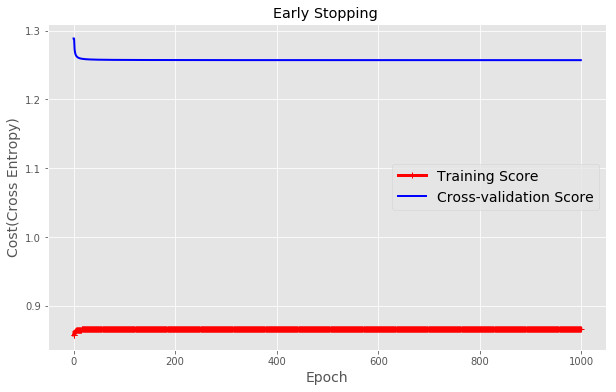

In [36]:
print("Solution 27")
early_soft_regression = Softmax_Regression()
early_soft_regression.fit(X_train, y_train, learning_rate=0.01, epochs=1000, tol=None, regularizer=None,lambd=0.0,early_stopping=True, validation_fraction=0.2)
y_early_pred = early_soft_regression.predict(X_test)



In [37]:
# score is an n X d matrix and softmax function calculates the exponential of the scores and normalizes them.

def softmax_sgd(score):
    new_score = np.exp(score)
    
#     new_score = np.exp(new_score- np.amax(new_score, axis=1, keepdims = True))
    
    sum_exp = np.sum( new_score )
    return  np.divide(new_score, sum_exp)



class Softmax_Regression_SGD:
    
    def __init__(self):
        pass
    
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None,lambd=0.0,early_stopping=False, validation_fraction=0.1,**kwargs):
        self.X = X
        self.y = Y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.regularizer = regularizer
        self.lambd = lambd
        self.early_stopping = early_stopping
        self.validation_fraction = validation_fraction
        self.early_stop_number = 50 # default
        self.error_function = ErrorFunction.mse.value
        
        for key, value in kwargs.items():
            if key == 'early_stop_number':
                self.early_stop_number = value
                
            if key == 'error_function':
                self.error_function = value
        
        y_one_hot = one_hot_labels(self.y)
        theta = np.zeros(shape = (self.X.shape[1]+1,y_one_hot.shape[1]))
        X_bias=np.c_[np.ones((self.X.shape[0],1)),self.X]
        N = X_bias.shape[0]
        counter = 1
        
        val_cost_list = []
        train_cost_list = []
        final_epoch = 0
        
        if self.early_stopping:
            X_bias, X_val, self.y, y_val = train_test_split(X_bias,self.y,self.validation_fraction)                
            
        y_one_hot = one_hot_labels(self.y)
        prev_sm_score = softmax_sgd(np.dot(X_bias[0,:],theta)) 
        
        prev_cross_entropy_loss = cross_entropy_loss(y_one_hot[0,:], prev_sm_score)    
        print(type(X_bias))
        for epoch in range(self.epochs):
            '''matmul between X_bias(N x d+1) and weight vector(d+1, C). No need to do the transpose of the weight vector.
            We would get the score matrix of (N x C)'''
            # shuffle the x_train and y)_train in the same way
            c = list(zip(X_bias, y_one_hot))
            np.random.shuffle(c)
            X_bias, y_train = zip(*c)
            
            length = len(X_bias)//3
            
            for i in range(length):
                
                regularized_constant = self.lambd * regularization(self.regularizer, theta)
                theta_hat = theta - (self.learning_rate/N) * (np.matmul(np.array(X_bias[i:i+3][:]).T,(prev_sm_score-y_one_hot[i:i+3,:]))+ regularized_constant)

                current_sm_score = softmax_sgd(np.dot(X_bias[i:i+3][:],theta_hat)) 
                current_cross_entropy_loss = cross_entropy_loss(y_one_hot[i:i+3][:], current_sm_score)

                final_epoch = epoch          
                if self.early_stopping:

                    y_pred_val = np.dot(X_val, theta_hat) 
                    sm_val_score = softmax_sgd(np.matmul(X_val,theta_hat))

                    y_val_one_hot = one_hot_labels(y_val)
                    current_val_cross_entropy_loss = cross_entropy_loss(y_val_one_hot, sm_val_score)


                    val_cost_list.append(current_val_cross_entropy_loss)
                    train_cost_list.append(current_cross_entropy_loss)
                    final_epoch = epoch
                    if counter == 1:
                        counter = counter +1
                        prev_val_cross_entropy_loss = current_val_cross_entropy_loss
                        continue
                        
                    if counter==self.early_stop_number:
                        break

                    if self.tol and current_val_cross_entropy_loss > prev_val_cross_entropy_loss - self.tol:
                        break

                    elif current_val_cross_entropy_loss > prev_val_cross_entropy_loss:
                        break



                elif self.tol and current_cross_entropy_loss > prev_cross_entropy_loss - self.tol:
                    break

                elif current_cross_entropy_loss > prev_cross_entropy_loss:
                    break

                # update previous values
                theta = theta_hat
                prev_cross_entropy_loss = current_cross_entropy_loss
                prev_sm_score =current_sm_score
            
        if self.early_stopping:  
            
            early_stopping_curve(train_cost_list, val_cost_list, final_epoch)  
            
        self.theta = theta_hat
        
        print("self.theta:", self.theta)
        
    def predict(self, X):
        X_test_bias=np.c_[np.ones((X_test.shape[0],1)),X_test]
        y_pred = np.dot(X_test_bias, self.theta)
        return y_pred
        
  
        

In [38]:
softmax_regression_sgd = Softmax_Regression_SGD()
softmax_regression_sgd.fit(X_train, y_train)
y_pred_sgd = softmax_regression_sgd.predict(X_test)
best_accuracy_error_sgd = error_score (ErrorFunction.accuracy.value,y_pred_sgd, one_hot_labels(y_test))
print("Best accuracy SGD: ",  1 - best_accuracy_error_sgd)

confusion_matrix  = confusion_matrix(y_pred_sgd, one_hot_labels(y_test))
print("Confusion Matrix SGD: ", confusion_matrix)


<class 'numpy.ndarray'>
self.theta: [[ 1.66666667e-04 -8.33333333e-05 -8.33333333e-05]
 [ 4.47530864e-05 -2.23765432e-05 -2.23765432e-05]
 [ 9.49074074e-05 -4.74537037e-05 -4.74537037e-05]
 [ 3.95480226e-05 -1.97740113e-05 -1.97740113e-05]
 [ 3.47222222e-05 -1.73611111e-05 -1.73611111e-05]]
Best accuracy SGD:  0.0
Confusion Matrix SGD:  [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [30.  0.  0.]]
